<a href="https://colab.research.google.com/github/sairamadithya/medical_waste_segregation/blob/main/web_waste_segregator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir= image.ImageDataGenerator(rescale=1./255,height_shift_range=0.1,width_shift_range=0.1,horizontal_flip=True)
test_dir= image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_set= train_dir.flow_from_directory(
    '/content/drive/MyDrive/waste_segregation/train',
    batch_size=16,
    class_mode='categorical',
    target_size=(224,224)
)
test_set= test_dir.flow_from_directory(
    '/content/drive/MyDrive/waste_segregation/test',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224)
)

Found 1061 images belonging to 4 classes.
Found 271 images belonging to 4 classes.


In [ ]:
train_set.class_indices

{'chemical': 0, 'general': 1, 'infectious': 2, 'sharp': 3}

In [ ]:
base_model = tensorflow.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False
model=Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax'))
model.summary()


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
gaussian_noise (GaussianNois (None, 7, 7, 1280)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 1280)        5120      
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
___________________________________________________________

In [ ]:
model.compile(optimizer='AdaGrad',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=5)
history=model.fit(
    train_set,
    epochs=30,
    steps_per_epoch= 66,
    validation_data= test_set,
    callbacks=es
)

Epoch 1/30
61/66 [==========================>...] - ETA: 37s - loss: 0.8449 - accuracy: 0.6902

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


66/66 [==============================] - 664s 10s/step - loss: 0.8527 - accuracy: 0.6880 - val_loss: 0.5337 - val_accuracy: 0.8118
Epoch 2/30
66/66 [==============================] - 18s 276ms/step - loss: 0.4241 - accuracy: 0.8526 - val_loss: 0.4286 - val_accuracy: 0.8376
Epoch 3/30
66/66 [==============================] - 18s 274ms/step - loss: 0.3013 - accuracy: 0.8957 - val_loss: 0.3592 - val_accuracy: 0.8708
Epoch 4/30
66/66 [==============================] - 18s 269ms/step - loss: 0.2457 - accuracy: 0.9167 - val_loss: 0.3555 - val_accuracy: 0.8745
Epoch 5/30
66/66 [==============================] - 18s 271ms/step - loss: 0.1792 - accuracy: 0.9435 - val_loss: 0.3640 - val_accuracy: 0.8819
Epoch 6/30
66/66 [==============================] - 18s 268ms/step - loss: 0.1726 - accuracy: 0.9426 - val_loss: 0.4027 - val_accuracy: 0.8524
Epoch 7/30
66/66 [==============================] - 18s 268ms/step - loss: 0.1353 - accuracy: 0.9617 - val_loss: 0.3911 - val_accuracy: 0.8598
Epoch 8/30


In [ ]:
model.evaluate(train_set)

62/67 [==========================>...] - ETA: 1s - loss: 0.0174 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


67/67 [==============================] - 16s 236ms/step - loss: 0.0169 - accuracy: 1.0000


[0.01690209098160267, 1.0]

In [ ]:
model.evaluate(test_set)

9/9 [==============================] - 2s 189ms/step - loss: 0.3868 - accuracy: 0.8930


[0.38683822751045227, 0.892988920211792]

[[0.18733789 0.07669721 0.12685993 0.60910493]]
Sharp


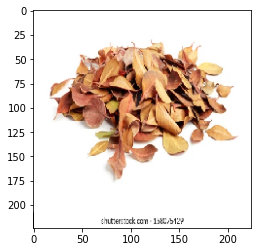

In [ ]:
from keras.preprocessing import image
img = image.load_img('1(5).jpeg.webp',target_size=(224,224))
imag = image.img_to_array(img)
image = np.expand_dims(img,axis=0)   ### flattening
ypred = model.predict(image)
a=np.argmax(ypred,-1)
print(ypred)
plt.imshow(img)
if a==[0]: 
    y='Chemical' 
elif a==[1]: 
    y='General'
elif a==[2]: 
    y='Infectious' 
elif a==[3]: 
    y='Sharp'
print(str(y))

In [ ]:
model.save('waste_segregator.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.0 MB 9.2 MB/s 
     |████████████████████████████████| 4.3 MB 39.3 MB/s 
     |████████████████████████████████| 111 kB 52.4 MB/s 
     |████████████████████████████████| 75 kB 3.9 MB/s 
     |████████████████████████████████| 170 kB 46.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 124 kB 51.2 MB/s 
     |████████████████████████████████| 787 kB 44.3 MB/s 
     |████████████████████████████████| 370 kB 45.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c6b217f501598263e7c1684bde995aed1308e5761381d57a5f6a6e77610e6c00
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/waste_segregator.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # WASTE SEGREGATION USING AI
           by V A SAIRAM AND M MADHAV
         """
         )
st.text("Waste segregation is one of the important environmental aspects to be covered of.")
st.text("Mixing of these wastes can make their disposal difficult and can pose serious environmental issues.")
st.text("Generally, big hospials and healthcare centers have their own collection sites, incinerators, shredders etc.")
st.text("But most of these facilities are not seen in small-time hospitals, private laboratories and household.")
st.text("So proper care and awareness about waste disposal has to be addressed to these sectors.")
st.text("This project is used to categorise the given waste into one of the four prominent medical wastes and also provides an efficient and proper way to dispose them.")
file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile", type=["jpg", "png","jpeg","webp"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
    st.text("Please upload an image file within the allotted file size or retry of the error still persists...")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names= ['CHEMICAL:DISPOSE IT IN THE YELLOW BIN. This includes of expired and discarded chemicals, mercury from broken thermometer and used up or leaking batteries. It is important of not to store these wastes along with the normal wastes. There are special containers available for storing the waste. They are made with a material compatible for chemicals and are leak-proof. The main purpose is to avoid the chemical reaction between wastes. Every hospitals have their own collection sites. There are special collection sites for the household chemical waste. It is better to collect the waste from residents of a community and then sending them to the collection sites for proper disposal.', 
                  'GENERAL: DISPOSE IT IN THE GREEN BIN. There are no hazards with this type of waste and this can be disposed of on the normal waste bin which will be sent to burial if bio-degradable or sent to other places based on the materials.',
                  'INFECTIOUS: DISPOSE IT IN THE RED BIN. Most of the wastes contaning human-fluid falls into this category. It is better to collect all the wastes in one container and then sending them to the collection sites. An hospital may have their own collection site. There are waste collection sites for residential communities. This will be sent to an on-site steriliser and either to an incinerator or medical waste shredder based on the material involved in the waste.',
                  'SHARP: DISPOSE IT IN THE WHITE BIN. There are chances that some of the infectious waste can fall into this category. The FDA recommends a two-step process for properly disposing of used needles and other sharps. STEP 1- collect all sharp waste in a seperate container. STEP 2- dispose them to the collection site. The collection site can be specific to a hospital or community. Courier of waste to them is also advisable. All of these waste are sent to the shredder and if they contain some human fluid then they are sterilised before shredding. The output is sent to industries for manufacturing new products.' 
                  ]
    string= "THE PARTICULAR WASTE CATEGORY IS: " + class_names[np.argmax(predictions)]
    st.success(string) 
    string1="Most of the wastes cannot be disposed at our homes. There are special collection sites for the disposal. Our work is to isolate the wastes into seperate containers which can be send to the collection sites for proper disposal."  
    string2="HOPE THIS HELPS!! THANK YOU FOR USING THIS PROJECT!!!"
    st.success(string1)
    st.success(string2)
  

Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-09-15 05:51:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  3.54MB/s    in 6.7s    

2021-09-15 05:51:48 (1.97 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'
    

Execute the next cell and the go to the following URL: https://fb08-34-78-35-91.ngrok.io


In [ ]:
!streamlit run /content/app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.78.35.91:8501

2021-09-15 06:22:47.317896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 06:22:47.327493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 06:22:47.328319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 06:22:47.329836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning